In [1]:
import os
os.listdir('../input/natural-images/natural_images')

['motorbike', 'airplane', 'flower', 'dog', 'fruit', 'car', 'cat', 'person']

In [2]:
from tqdm import tqdm
import cv2
loc1 = '../input/natural-images/natural_images/motorbike'
loc2 = '../input/natural-images/natural_images/airplane'
loc3 = '../input/natural-images/natural_images/flower'

features = []
for i in tqdm(os.listdir(loc1)):
    f1 = cv2.imread(os.path.join(loc1,i))
    f1r = cv2.resize(f1,(70,70))
    features.append(f1r)
    
for i in tqdm(os.listdir(loc2)):
    f2 = cv2.imread(os.path.join(loc2,i))
    f2r = cv2.resize(f2,(70,70))
    features.append(f2r)
    
for i in tqdm(os.listdir(loc3)):
    f3 = cv2.imread(os.path.join(loc3,i))
    f3r = cv2.resize(f3,(70,70))
    features.append(f3r)

100%|██████████| 843/843 [00:10<00:00, 77.69it/s]


In [7]:
import numpy as np
X = np.array(features)

In [4]:
labels = []
for i in tqdm(os.listdir(loc1)):
    labels.append(0)
    
for i in tqdm(os.listdir(loc2)):
    labels.append(1)
    
for i in tqdm(os.listdir(loc3)):
    labels.append(2)

100%|██████████| 843/843 [00:00<00:00, 386299.39it/s]


In [5]:
Y = np.array(labels)

In [6]:
print(X.shape)
print(Y.shape)

(2358, 70, 70, 3)
(2358,)


In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.utils import np_utils

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [10]:
xtrain_n = xtrain/xtrain.max()
xtest_n = xtest/xtest.max()

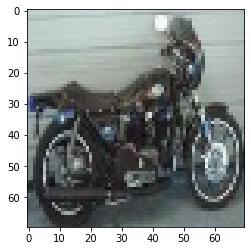

In [11]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[561])
plt.show()

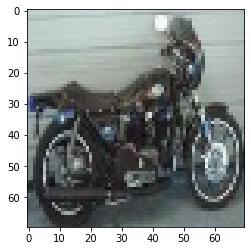

In [12]:
plt.imshow(xtrain_n[561])
plt.show()

In [13]:
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

In [14]:
ytest

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [15]:
xtrain.shape[1:]

(70, 70, 3)

In [16]:
model = Sequential()
model.add(Conv2D(32, (3,3) , padding='same', input_shape=xtrain.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(512, (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(3,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 70, 70, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 35, 35, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0

In [18]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [21]:
model.fit(xtrain_n,ytrain,batch_size=128,epochs=45,validation_data=(xtest_n,ytest))

Epoch 1/45
14/14 [==============================] - 0s 28ms/step - loss: 0.0361 - accuracy: 0.9876 - val_loss: 0.0830 - val_accuracy: 0.9661
Epoch 2/45
14/14 [==============================] - 0s 23ms/step - loss: 0.0346 - accuracy: 0.9881 - val_loss: 0.0895 - val_accuracy: 0.9729
Epoch 3/45
14/14 [==============================] - 0s 22ms/step - loss: 0.0348 - accuracy: 0.9904 - val_loss: 0.0725 - val_accuracy: 0.9763
Epoch 4/45
14/14 [==============================] - 0s 22ms/step - loss: 0.0650 - accuracy: 0.9745 - val_loss: 0.1049 - val_accuracy: 0.9644
Epoch 5/45
14/14 [==============================] - 0s 23ms/step - loss: 0.0393 - accuracy: 0.9853 - val_loss: 0.0962 - val_accuracy: 0.9661
Epoch 6/45
14/14 [==============================] - 0s 23ms/step - loss: 0.0548 - accuracy: 0.9813 - val_loss: 0.1496 - val_accuracy: 0.9508
Epoch 7/45
14/14 [==============================] - 0s 22ms/step - loss: 0.0459 - accuracy: 0.9847 - val_loss: 0.1511 - val_accuracy: 0.9508
Epoch 8/45
14

In [22]:
print(model.evaluate(xtrain_n,ytrain)[1])
print(model.evaluate(xtest_n,ytest)[1])

56/56 [==============================] - 0s 4ms/step - loss: 0.0227 - accuracy: 0.9921
0.9920814633369446
19/19 [==============================] - 0s 5ms/step - loss: 0.0899 - accuracy: 0.9678
0.9677966237068176


In [23]:
xtrain.shape[0]/128

13.8125

In [24]:
xtrain.shape

(1768, 70, 70, 3)

In [25]:
xtest[98].shape

(70, 70, 3)

In [26]:
model.predict(xtest_n[98].reshape(1,70,70,3))

array([[3.5134633e-04, 2.8458131e-03, 9.9680281e-01]], dtype=float32)

Motorbike


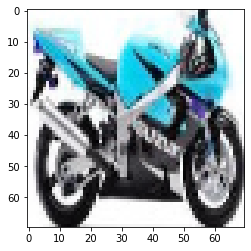

In [27]:
Predicted_Label = ['Motorbike','Airplane','Flower']
import numpy as np
print(Predicted_Label[np.argmax(model.predict(xtest_n[175].reshape(1,70,70,3)))])
plt.imshow(xtest_n[175])
plt.show()